# Explore here

In [41]:
import os
from dotenv import load_dotenv
load_dotenv()


client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [40]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))

# Configurar la autenticación con las credenciales del cliente
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [42]:
artist_id = '1vCWHaC5f2uS3yhpwWbIA6'  # ID del artista AVICCI

# Obtener las 10 canciones más populares del artista
top_tracks = sp.artist_top_tracks(artist_id)

# Mostrar el top 10 de canciones del artista
print(f"Canciones populares de {top_tracks['tracks'][0]['artists'][0]['name']}:\n")
for track in top_tracks['tracks']:
    song_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']  # Duración en milisegundos
    duration_min = duration_ms / 60000  # Convertir a minutos

    print(f"Nombre: {song_name} - Popularidad: {popularity} - Duración: {duration_min:.2f} minutos")

Canciones populares de Avicii:

Nombre: Wake Me Up - Popularidad: 89 - Duración: 4.12 minutos
Nombre: The Nights - Popularidad: 88 - Duración: 2.94 minutos
Nombre: Waiting For Love - Popularidad: 84 - Duración: 3.84 minutos
Nombre: Levels - Radio Edit - Popularidad: 83 - Duración: 3.33 minutos
Nombre: Without You (feat. Sandro Cavazza) - Popularidad: 82 - Duración: 3.03 minutos
Nombre: Hey Brother - Popularidad: 81 - Duración: 4.25 minutos
Nombre: Addicted To You - Popularidad: 78 - Duración: 2.47 minutos
Nombre: SOS (feat. Aloe Blacc) - Popularidad: 75 - Duración: 2.62 minutos
Nombre: I Could Be The One (Avicii Vs. Nicky Romero) - Radio Edit - Popularidad: 65 - Duración: 3.47 minutos
Nombre: Lonely Together (feat. Rita Ora) - Popularidad: 75 - Duración: 3.03 minutos


In [43]:
# Crear el DataFrame con los datos obtenidos
tracks_data = []
for track in top_tracks['tracks']:
    track_info = {
        'Canción': track['name'],
        'Popularidad': track['popularity'],
        'Duración (min)': track['duration_ms'] / 60000
    }
    tracks_data.append(track_info)

# Convertir la lista de diccionarios a un DataFrame de Pandas
tracks_df = pd.DataFrame(tracks_data)

# Ordenar el DataFrame por popularidad
tracks_df.sort_values(["Popularidad"], inplace=True)

# Mostrar el top 3 de canciones más populares
top_3_popular = tracks_df.head(3)
print("Top 3 de canciones más populares:")
print(top_3_popular)

Top 3 de canciones más populares:
                                             Canción  Popularidad  \
8  I Could Be The One (Avicii Vs. Nicky Romero) -...           65   
7                             SOS (feat. Aloe Blacc)           75   
9                   Lonely Together (feat. Rita Ora)           75   

   Duración (min)  
8        3.472000  
7        2.620033  
9        3.030200  


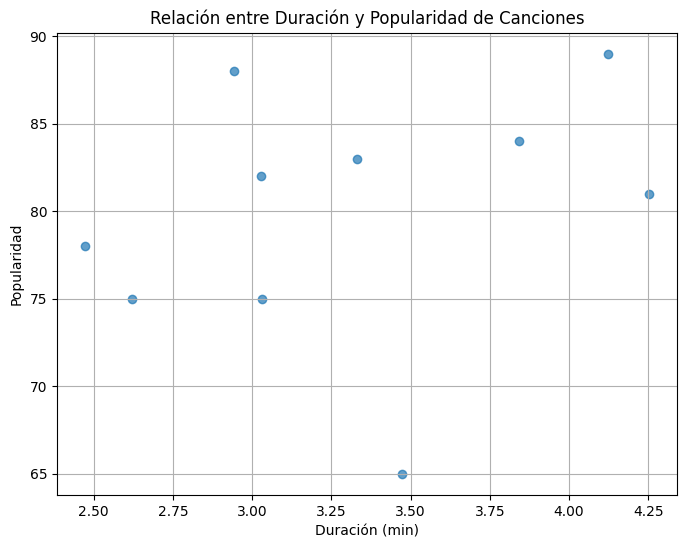

In [44]:
import matplotlib.pyplot as plt


# Duración vs Popularidad
plt.figure(figsize=(8, 6))
plt.scatter(tracks_df['Duración (min)'], tracks_df['Popularidad'], alpha=0.7)
plt.title('Relación entre Duración y Popularidad de Canciones')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

Como podemos observar en la grafica, no existe una relación directa entre la duración de la canción y su popularidad. Por lo tanto no hay relacion alguna entre una y otra.